<h4 style="color:purple">Nasir Hussain 04072013040</h4>

<center>
<h3 style="color:purple">Introduction to Data Mining</h3>
<h4 style="color:purple">Assignment : 01</h4>
</center>

<p style="color:red">Pandas Library is not used for any task of assignment. However it is used for some elaboration</p>

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<h3 style="color:purple">Task 1:Load the dataset</h3>

In [45]:
dataset=np.genfromtxt("Bank Marketing Dataset.csv",delimiter=",",dtype=str)
dataset = dataset[:1001]
dataset

array([['age', 'job', 'marital', ..., 'previous', 'poutcome',
        'subscribed'],
       ['30', 'unemployed', 'married', ..., '0', 'unknown', 'no'],
       ['33', 'services', 'married', ..., '4', 'failure', 'no'],
       ...,
       ['34', 'management', 'single', ..., '1', 'failure', 'no'],
       ['40', 'services', 'married', ..., '0', 'unknown', 'no'],
       ['20', 'student', 'single', ..., '5', 'failure', 'no']],
      dtype='<U13')

In [46]:
data=pd.read_csv("Bank Marketing Dataset.csv")
data=data.iloc[:1000]
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [47]:
len(data)

1000

<h3 style="color:purple">Task 2:Find the average, mean, median and standard deviation of one numerical attribute</h3>

I have select the Balance column of Dataset which is 5th column of dataset

In [48]:
Customer_Balance = dataset[1:, 5].astype(float)

In [49]:
Mean_Balance=np.mean(Customer_Balance)
Median_Balance=np.median(Customer_Balance)
Average_Balance=np.average(Customer_Balance)
Std_Balance=np.std(Customer_Balance)

In [50]:
print("Mean of Customer Balance is : ",Mean_Balance)
print("Median of Customer Balance is : ",Median_Balance)
print("Average of Customer Balance is : ",Average_Balance)
print("Standard Deviation of Customer Balance is : ",Std_Balance)

Mean of Customer Balance is :  1498.592
Median of Customer Balance is :  462.0
Average of Customer Balance is :  1498.592
Standard Deviation of Customer Balance is :  2777.026952252354


<p style="color:green">Here data is dataframe and we can verify our result by using below Pandas method</p>

In [51]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.174000,1498.592000,15.893000,263.780000,2.649000,40.371000,0.561000
std,10.463135,2778.416508,8.263767,273.777979,2.850601,96.981414,1.684968
min,19.000000,-1680.000000,1.000000,5.000000,1.000000,-1.000000,0.000000
25%,33.000000,81.000000,8.000000,106.000000,1.000000,-1.000000,0.000000
50%,40.000000,462.000000,16.000000,187.500000,2.000000,-1.000000,0.000000
75%,49.000000,1526.750000,21.000000,321.500000,3.000000,-1.000000,0.000000
max,83.000000,26965.000000,31.000000,3025.000000,32.000000,462.000000,20.000000


<h3 style="color:purple">Task 3:Visualize one or more attributes using scatter plots</h3>

In [52]:
%matplotlib inline

In [53]:
Customer_Ages = dataset[1:, 0].astype(float)
Campaign = dataset[1:, 12].astype(float)


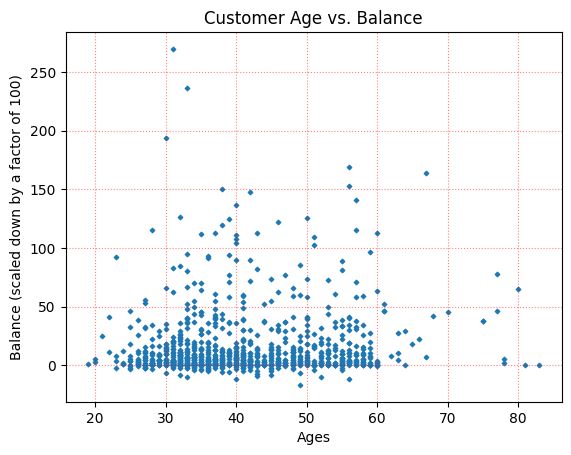

In [54]:
plt.scatter(Customer_Ages,(Customer_Balance/100),marker="D",s=5)
plt.xlabel("Ages")
plt.ylabel("Balance (scaled down by a factor of 100)")
plt.title("Customer Age vs. Balance")

plt.grid(color="red", linestyle=":", alpha=0.5)

<p style="color:maroon"I have used only 100 data from dataset and we can we see that there is no relationship between balance and ages</p>

<p style="color:blue">We can see that there is no relationship between Ages and Balance which mean Balance is not depend on Age.</p>

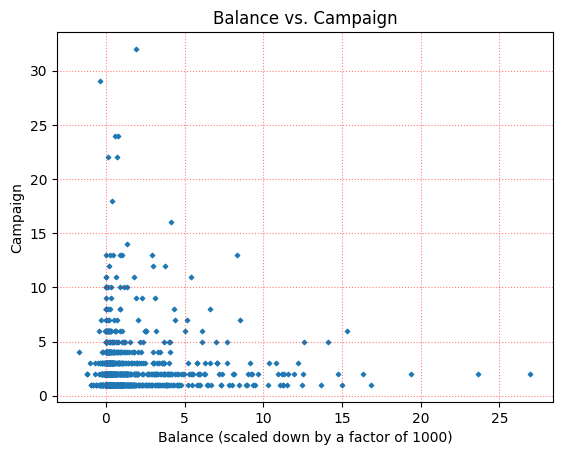

In [55]:
plt.scatter((Customer_Balance/1000),Campaign,marker='D',s=5)

plt.xlabel("Balance (scaled down by a factor of 1000)")
plt.ylabel("Campaign")
plt.title("Balance vs. Campaign")

plt.grid(color="red", linestyle=":", alpha=0.5)

<h3 style="color:purple">Task 4:Find the similarity using an appropriate measure between any two categorical attributes</h3>

<center> <h3 style="color:green"> simple matching method -> dij = (p - m) / p </h3></center>

In [56]:
Customer_Marital = dataset[1:, 2]
np.unique(Customer_Marital)

array(['divorced', 'married', 'single'], dtype='<U13')

In [57]:
Customer_Education = dataset[1:, 3]
np.unique(Customer_Education)

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype='<U13')

In [58]:
summ=0
count=0
dsim_matrix_nom = np.zeros((1000, 1000))
for i in range(1000):
    for j in range(i):
        p=2
        m=0
        if(Customer_Marital[i]==Customer_Marital[j]):
            m+=1
        if(Customer_Education[i]==Customer_Education[j]):
            m+=1
        r=(p-m)/p
        dsim_matrix_nom[i][j]=r
        summ+=dsim_matrix_nom[i][j]
        count+=1
        

In [59]:
dsim_matrix_nom

array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0.5, 0. , 0. , ..., 0. , 0. , 0. ],
       [1. , 1. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [1. , 1. , 0. , ..., 0. , 0. , 0. ],
       [0.5, 0. , 1. , ..., 1. , 0. , 0. ],
       [1. , 0.5, 0.5, ..., 0.5, 0.5, 0. ]])

In [60]:
mean_matrix=summ/count
mean_matrix

0.5931031031031031

In [61]:
simmilarity_nom = 1 - mean_matrix
simmilarity_nom

0.4068968968968969

<p style="color:magenta"> The average simmilarity between two categorical attribute (Marital and Education) of all data-object is <b>0.4068968968968969</b></p>

<h3 style="color:purple">Task 5:Find the similarity using an appropriate measure between any two numeric attributes</h3>

<center> <h3 style="color:green"> normalization formula -> dij = |xif - xjf| / max - min</h3></center>

In [62]:
max_age=np.max(Customer_Ages)
min_age=np.min(Customer_Ages)
max_bal=np.max(Customer_Balance)
min_bal=np.min(Customer_Balance)

In [63]:
n_summ=0
n_count=0

norm_Customer_Ages = np.zeros((1000, 1000))
norm_Customer_Balance = np.zeros((1000, 1000))
norm_Age_Bal=np.zeros((1000,1000))

for i in range(1000):
    for j in range(i):
        norm_Customer_Ages[i][j]=(abs(Customer_Ages[i]-Customer_Ages[j]))/(max_age-min_age)
        
        norm_Customer_Balance[i][j]=(abs(Customer_Balance[i]-Customer_Balance[j]))/(max_bal-min_bal)
        norm_Age_Bal[i][j]=norm_Customer_Ages[i][j]+norm_Customer_Balance[i][j]
        
        n_summ+=(norm_Customer_Ages[i][j]+norm_Customer_Balance[i][j])
        n_count+=1

In [64]:
norm_Age_Bal

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.15167514, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.09338072, 0.15130586, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.10138986, 0.159315  , 0.03925914, ..., 0.        , 0.        ,
        0.        ],
       [0.23057362, 0.28849876, 0.1371929 , ..., 0.12918376, 0.        ,
        0.        ],
       [0.20847552, 0.36015066, 0.2713448 , ..., 0.23208566, 0.3345981 ,
        0.        ]])

In [65]:
n_dis_mean=n_summ/n_count
n_dis_mean

0.26104660522996653

In [66]:
simmilarity_numeric=1-n_dis_mean
simmilarity_numeric

0.7389533947700335

<p style="color:magenta"> The average simmilarity between two numeric attribute (Age and Balance) of all data-object is <b>0.7389533947700335</b></p>

<h4 style="color:red">-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</h4>

<center><h2 style="color:purple">END OF ASSIGNMENT</h2></center>

<h4 style="color:red">-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</h4>

<p style="color:red">Tried with Euclidean. Not part of assignment</p>

In [67]:
age_bal_simm=np.stack((Customer_Ages,Customer_Balance),axis=1)

In [68]:
summ2=0
count2=0
dsimm_matrix = np.zeros((1000, 1000))
for i in range(1000):
    for j in range(i):
        dsimm_matrix[i][j] = np.linalg.norm(age_bal_simm[i] - age_bal_simm[j])
        summ2+=dsimm_matrix[i][j]
        count2+=1

In [69]:
dsimm_matrix

array([[   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [3002.001499  ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [ 437.02860318, 3439.00058156,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [1114.00718131, 4116.00012148,  677.00073855, ...,    0.        ,
           0.        ,    0.        ],
       [2129.02348507, 5131.0047749 , 1692.00738769, ..., 1015.01773384,
           0.        ,    0.        ],
       [1496.03342209, 4498.01878609, 1059.10622697, ...,  382.25645842,
         633.31587695,    0.        ]])

In [70]:
min_val = np.min(dsimm_matrix)
max_val = np.max(dsimm_matrix)

mean_matrix_num=summ2/count2
normalized_disim = (mean_matrix_num - min_val) / (max_val-min_val)

normalized_disim

0.07781001381568167

In [71]:
1-normalized_disim

0.9221899861843184